In [46]:
import pandas as pd
import matplotlib.pyplot as plt  #  المكتبة دي علشان نرسم البيانات 

In [47]:
covid="D:/covid19.csv"

covid_df= pd.read_csv(covid)

In [48]:
population="D:/population.csv"
population_df = pd.read_csv(population)

In [49]:
cases_columns= covid_df.columns[4:]
# البيانات بتاعة كوفيد فيها تواريخ من أول العمود الخامس فهنا بناخد الأعمدة دي
#الكومنتات علشان اراجع بس 
covid_df["total_cases"] = covid_df[cases_columns].sum(axis=1)
#بنحسب الحالات لكل صف

In [50]:
covid_cleaned= covid_df.groupby("Country/Region")["total_cases"].sum() .reset_index()

In [51]:
print(population_df.columns)


Index(['Country Name', 'Country Code', 'Year', 'Value'], dtype='object')


In [52]:
# من غير دي  في دول هتتكرر و هيكون الامارات وقطر بس ف خليتها لكل سنة 
population_df = population_df[population_df["Year"] == population_df["Year"].max()]

In [53]:
mergedd_df = pd.merge(covid_cleaned, population_df, left_on="Country/Region", right_on="Country Name")

In [54]:
mergedd_df["cases_for_million"] = (mergedd_df["total_cases"] / mergedd_df["Value"]) * 1_000_000

In [55]:
top_5 = mergedd_df.nlargest(5, "cases_for_million")

In [56]:
print("أعلى 5 دول في الحالات لكل مليون:")
print(top_5[["Country/Region", "cases_for_million"]])

أعلى 5 دول في الحالات لكل مليون:
    Country/Region  cases_for_million
3          Andorra       3.035956e+08
132     San Marino       3.008118e+08
140       Slovenia       2.694228e+08
105     Montenegro       2.488875e+08
42         Denmark       2.457819e+08


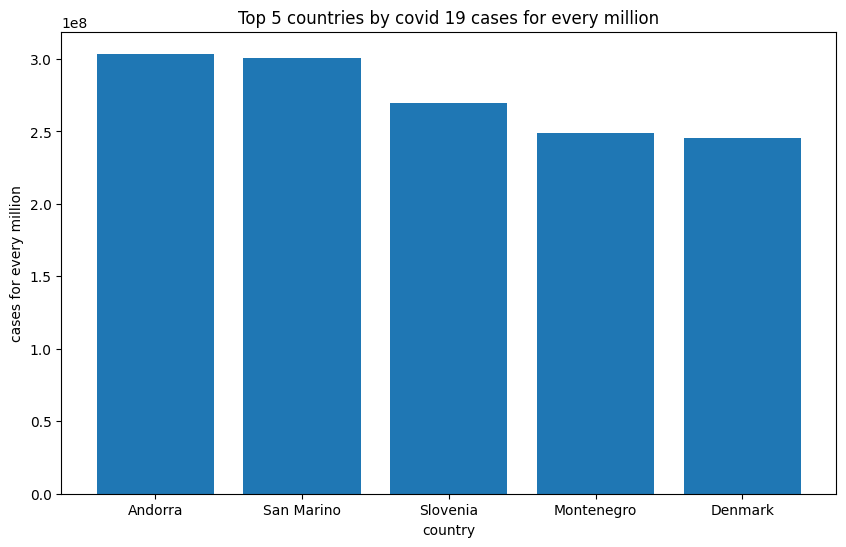

In [59]:
plt.figure (figsize=(10 , 6))
plt.bar (top_5["Country/Region"], top_5["cases_for_million"]) 
plt.xlabel("country")  
plt.ylabel("cases for every million")
plt.title("Top 5 countries by covid 19 cases for every million") 
plt.show() 